<a href="https://colab.research.google.com/github/corydoras15/Machine-Learning/blob/main/4_Logistic_Regression_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hr_df = pd.read_csv('https://raw.githubusercontent.com/DSNote/fastcampus/main/hr.csv')

In [4]:
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [64]:
hr_df1 = hr_df.drop('employee_id', axis=1)

In [7]:
hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won?           54808 non-null  int64  
 10  avg_training_score    54808 non-null  int64  
 11  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


In [9]:
hr_df1.describe(include='all')

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000


In [10]:
hr_df1['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

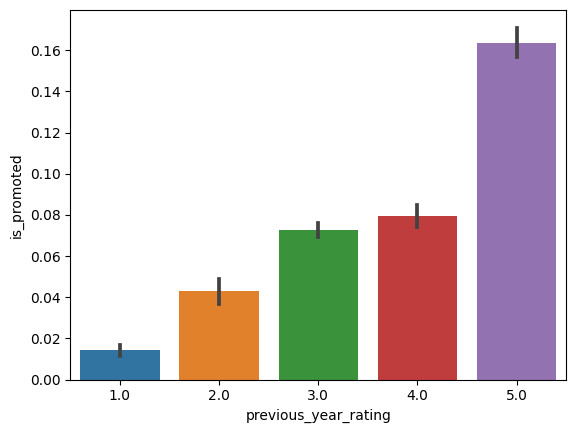

In [11]:
sns.barplot(x='previous_year_rating', y='is_promoted', data=hr_df1)

<Axes: xlabel='previous_year_rating', ylabel='is_promoted'>

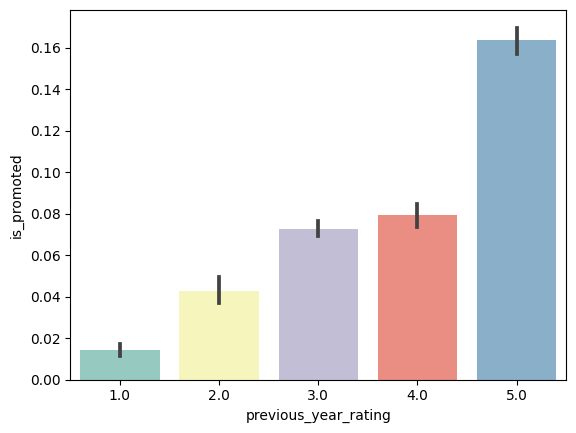

In [18]:
sns.barplot(x= hr_df1['previous_year_rating'], y= hr_df1['is_promoted'], palette= 'Set3')

<ipython-input-20-480c5694718f>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x= hr_df1['avg_training_score'], y= hr_df1['is_promoted'], palette= 'Set3')


<Axes: xlabel='avg_training_score', ylabel='is_promoted'>

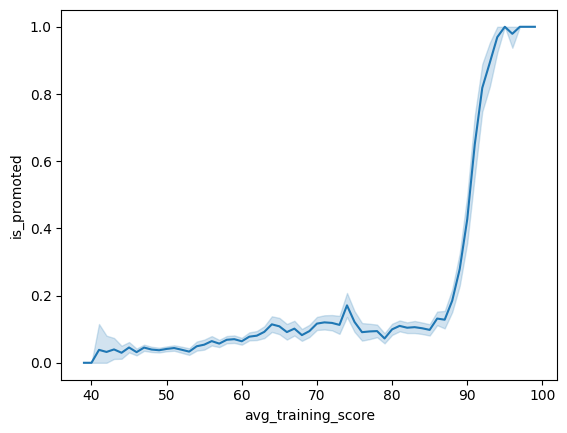

In [20]:
 sns.lineplot(x= hr_df1['avg_training_score'], y= hr_df1['is_promoted'], palette= 'Set3')

<Axes: xlabel='recruitment_channel', ylabel='is_promoted'>

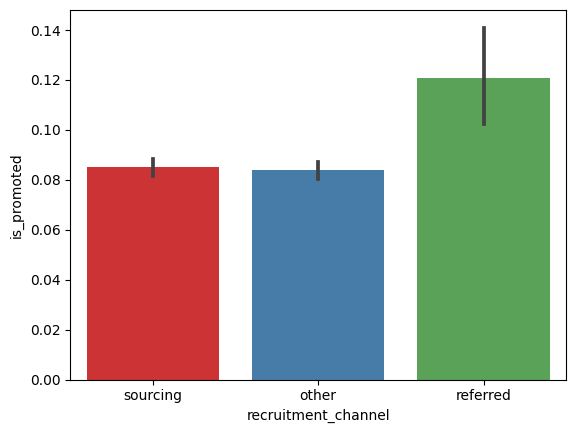

In [22]:
sns.barplot(x= hr_df1['recruitment_channel'], y= hr_df1['is_promoted'], palette= 'Set1') # 검은줄은 오차범위 오차범위가 크면 데이터수가 적어 확신이 부족

In [23]:
hr_df1['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

<Axes: xlabel='gender', ylabel='is_promoted'>

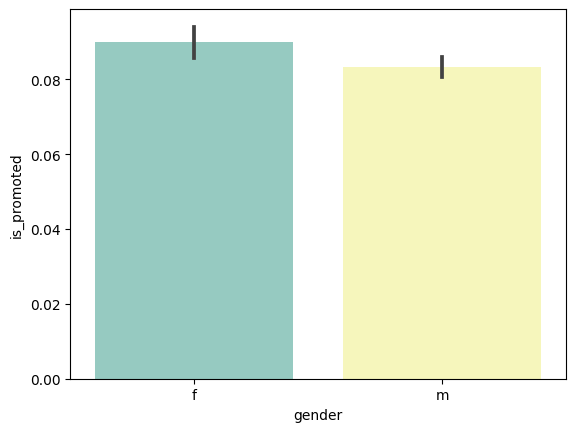

In [24]:
sns.barplot(x= hr_df1['gender'], y= hr_df1['is_promoted'], palette= 'Set3')

In [25]:
hr_df1['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales & Marketing'),
  Text(1, 0, 'Operations'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Analytics'),
  Text(4, 0, 'R&D'),
  Text(5, 0, 'Procurement'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'HR'),
  Text(8, 0, 'Legal')])

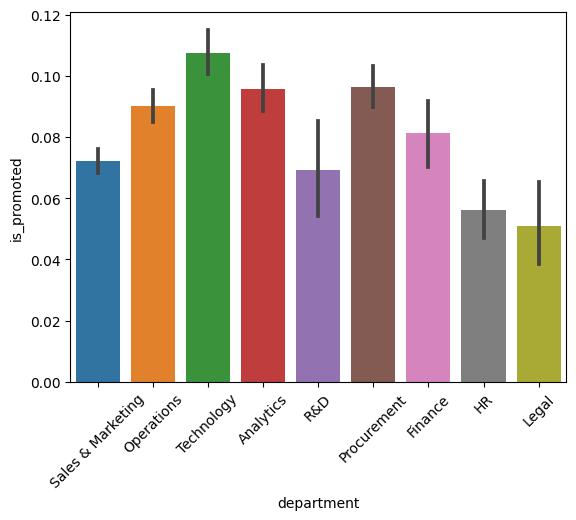

In [28]:
sns.barplot(x= hr_df1['department'], y= hr_df1['is_promoted'])
plt.xticks(rotation= 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_22'),
  Text(2, 0, 'region_19'),
  Text(3, 0, 'region_23'),
  Text(4, 0, 'region_26'),
  Text(5, 0, 'region_2'),
  Text(6, 0, 'region_20'),
  Text(7, 0, 'region_34'),
  Text(8, 0, 'region_1'),
  Text(9, 0, 'region_4'),
  Text(10, 0, 'region_29'),
  Text(11, 0, 'region_31'),
  Text(12, 0, 'region_15'),
  Text(13, 0, 'region_14'),
  Text(14, 0, 'region_11'),
  Text(15, 0, 'region_5'),
  Text(16, 0, 'region_28'),
  Text(17, 0, 'region_17'),
  Text(18, 0, 'region_13'),
  Text(19, 0, 'region_16'),
  Text(20, 0, 'region_25'),
  Text(21, 0, 'region_10'),
  Text(22, 0, 'region_27'),
  Text(23, 0, 'region_30'),
  Text(24, 0, 'region_12'),
  Text(25, 0, 'region_21'),
  Text(26, 0, 'region_8'),
  Text(27, 0, 'region_32'),
  Text(28, 0, 'region_6'),
  Text(29, 0, 'region_33'),
  Text(30, 0, 'region_2

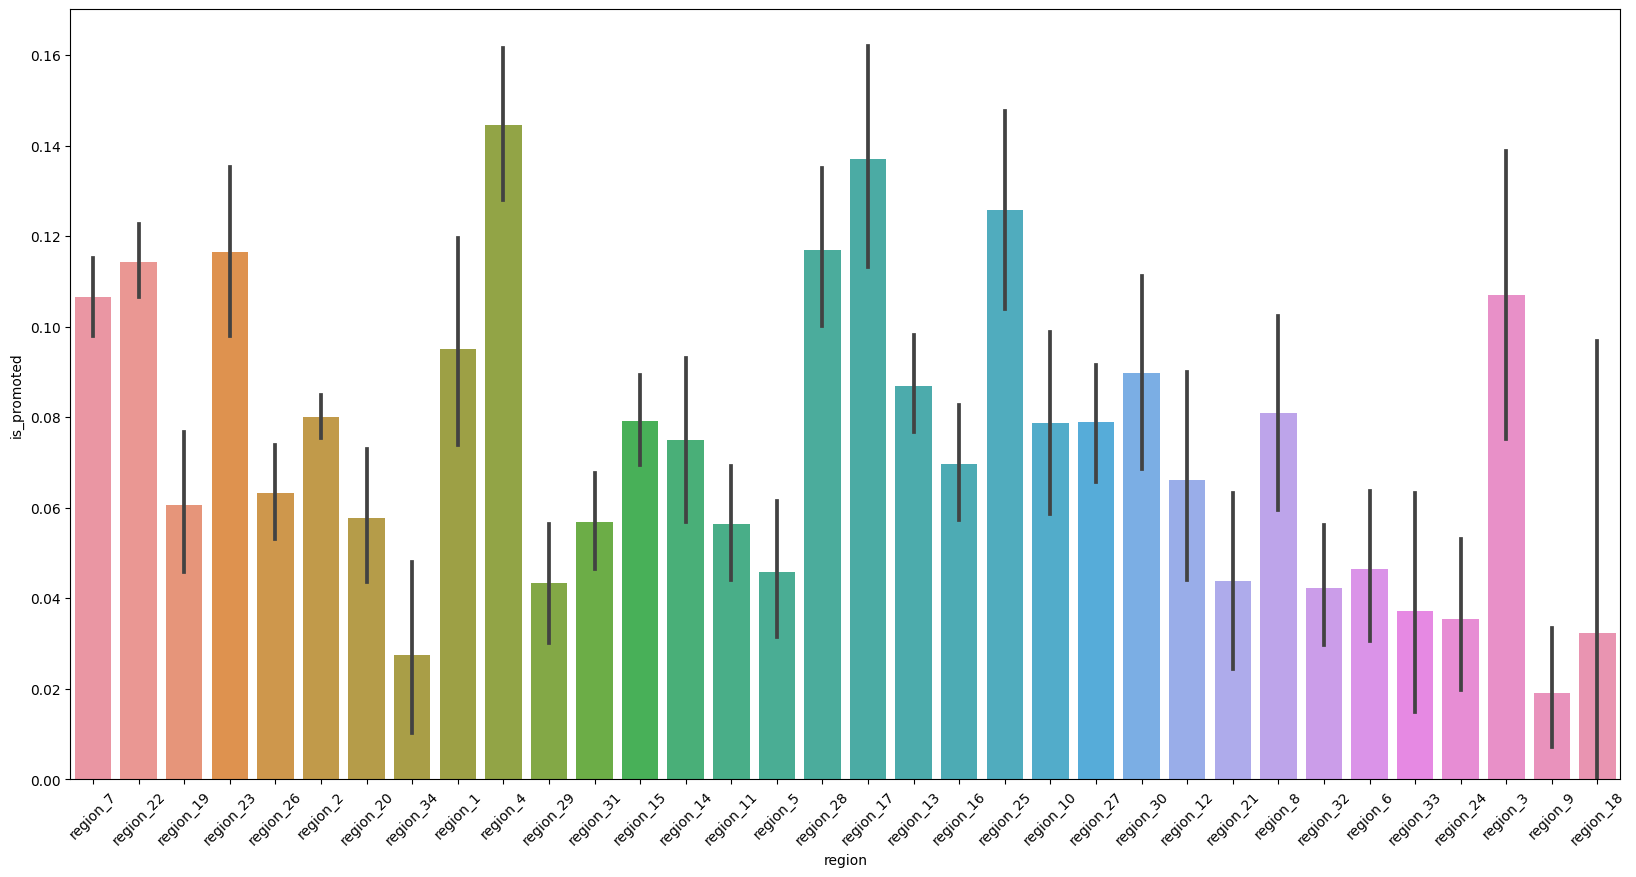

In [32]:
from matplotlib import figure
plt.figure(figsize=(20, 10))
sns.barplot(x= hr_df1['region'], y= hr_df1['is_promoted'])
plt.xticks(rotation= 45)

에러바가 겹치지 않으면 유의미한 차이가 있다

<ipython-input-38-f451591f2f97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hr_df1.corr(), cmap= 'coolwarm', vmin= -1, vmax= 1, annot= True)


<Axes: >

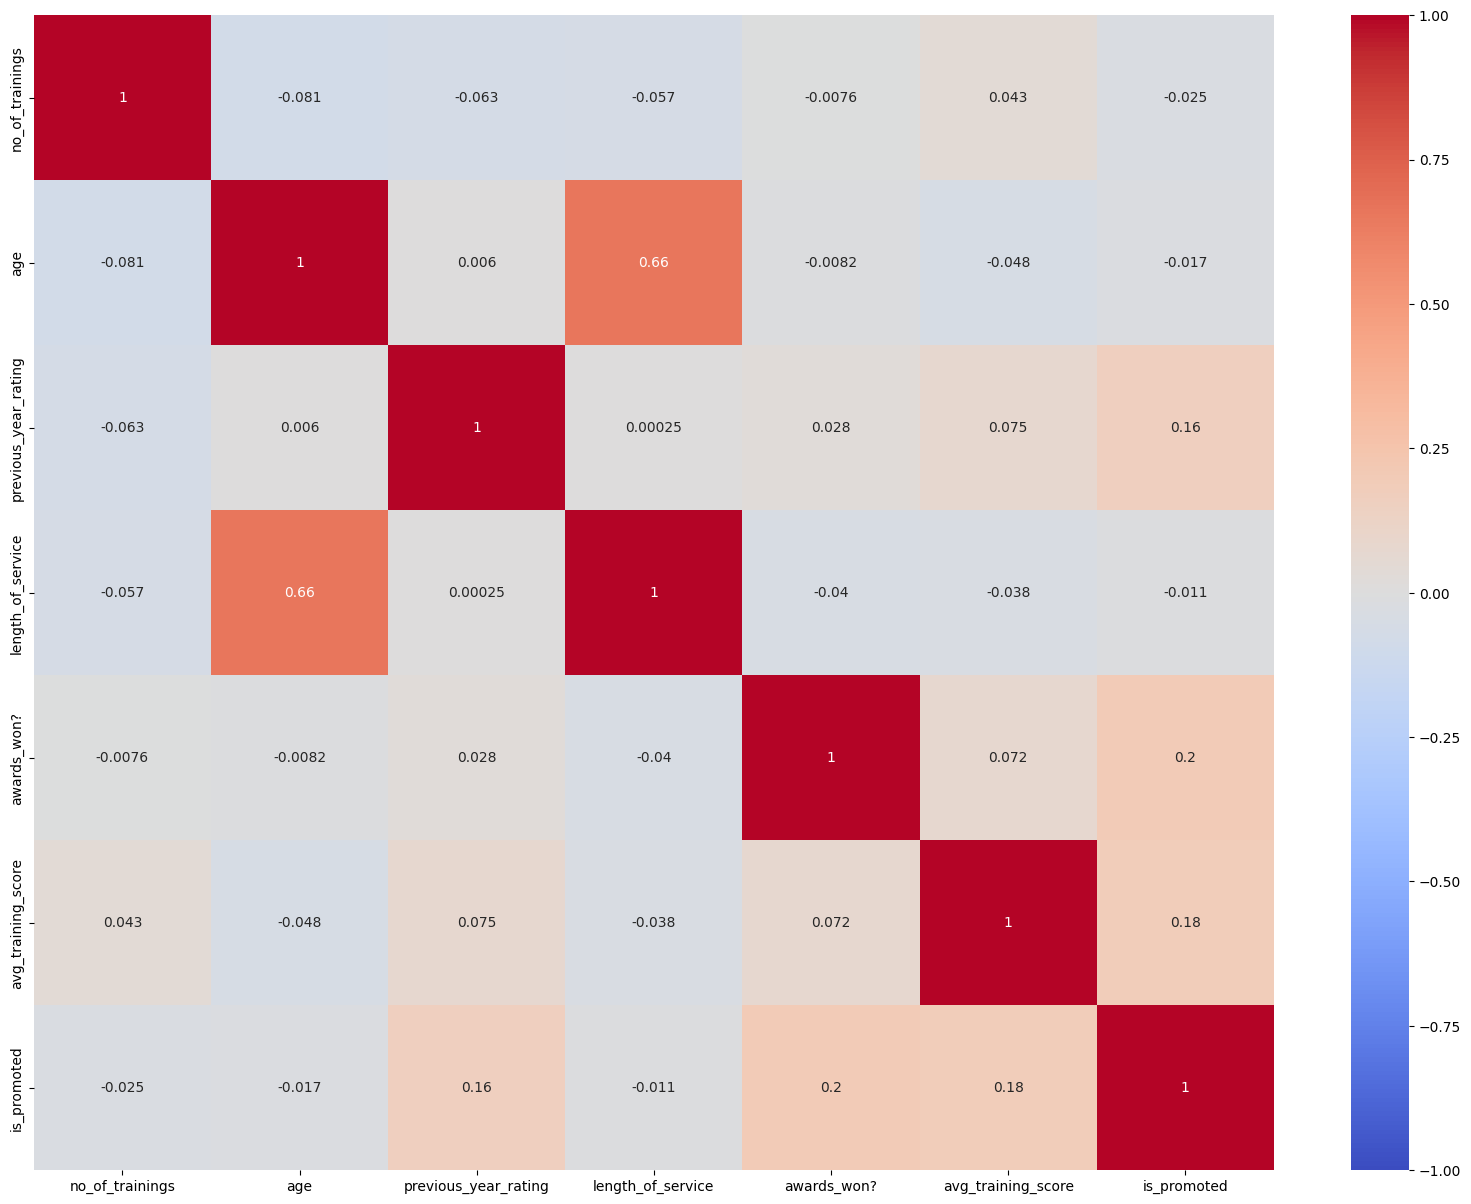

In [38]:
plt.figure(figsize=(20, 15))
sns.heatmap(hr_df1.corr(), cmap= 'coolwarm', vmin= -1, vmax= 1, annot= True) # 색이 진할수록 상관관계 크다

# 결측치 처리

In [40]:
hr_df1.isna().mean()

department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [58]:
hr_df1['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [65]:
hr_df1['education'] = hr_df1['education'].fillna('unkown')

In [66]:
hr_df1['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [67]:
hr_df1 = hr_df1.dropna()

# 더미변수 변환

In [68]:
hr_df1.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0


In [75]:
for i in ['department', 'region', 'education', 'gender', 'recruitment_channel']:
 print(i, hr_df1[i].nunique())

department 9
region 34
education 4
gender 2
recruitment_channel 3


In [77]:
hr_df1 = pd.get_dummies(hr_df1, columns= ['department', 'region', 'education', 'gender', 'recruitment_channel'])

In [78]:
hr_df1.head(3)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_unkown,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,0,49,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,30,5.0,4,0,60,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,1,34,3.0,7,0,50,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


# 모델링

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(hr_df1.drop('is_promoted', axis= 1), hr_df1['is_promoted'], test_size= 0.3, random_state= 100)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()

In [83]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
pred = lr.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix # 전체중에 맞힌 비율,

In [86]:
accuracy_score(y_test, pred) # 92% 에측 하지만 진급률이 8.5%라서 모델없이 예측도 91.5% 기울어진 데이터는 정확도 올리기 힘들다

0.9212153097461528

In [87]:
confusion_matrix(y_test, pred)

array([[13791,   122],
       [ 1076,   217]])

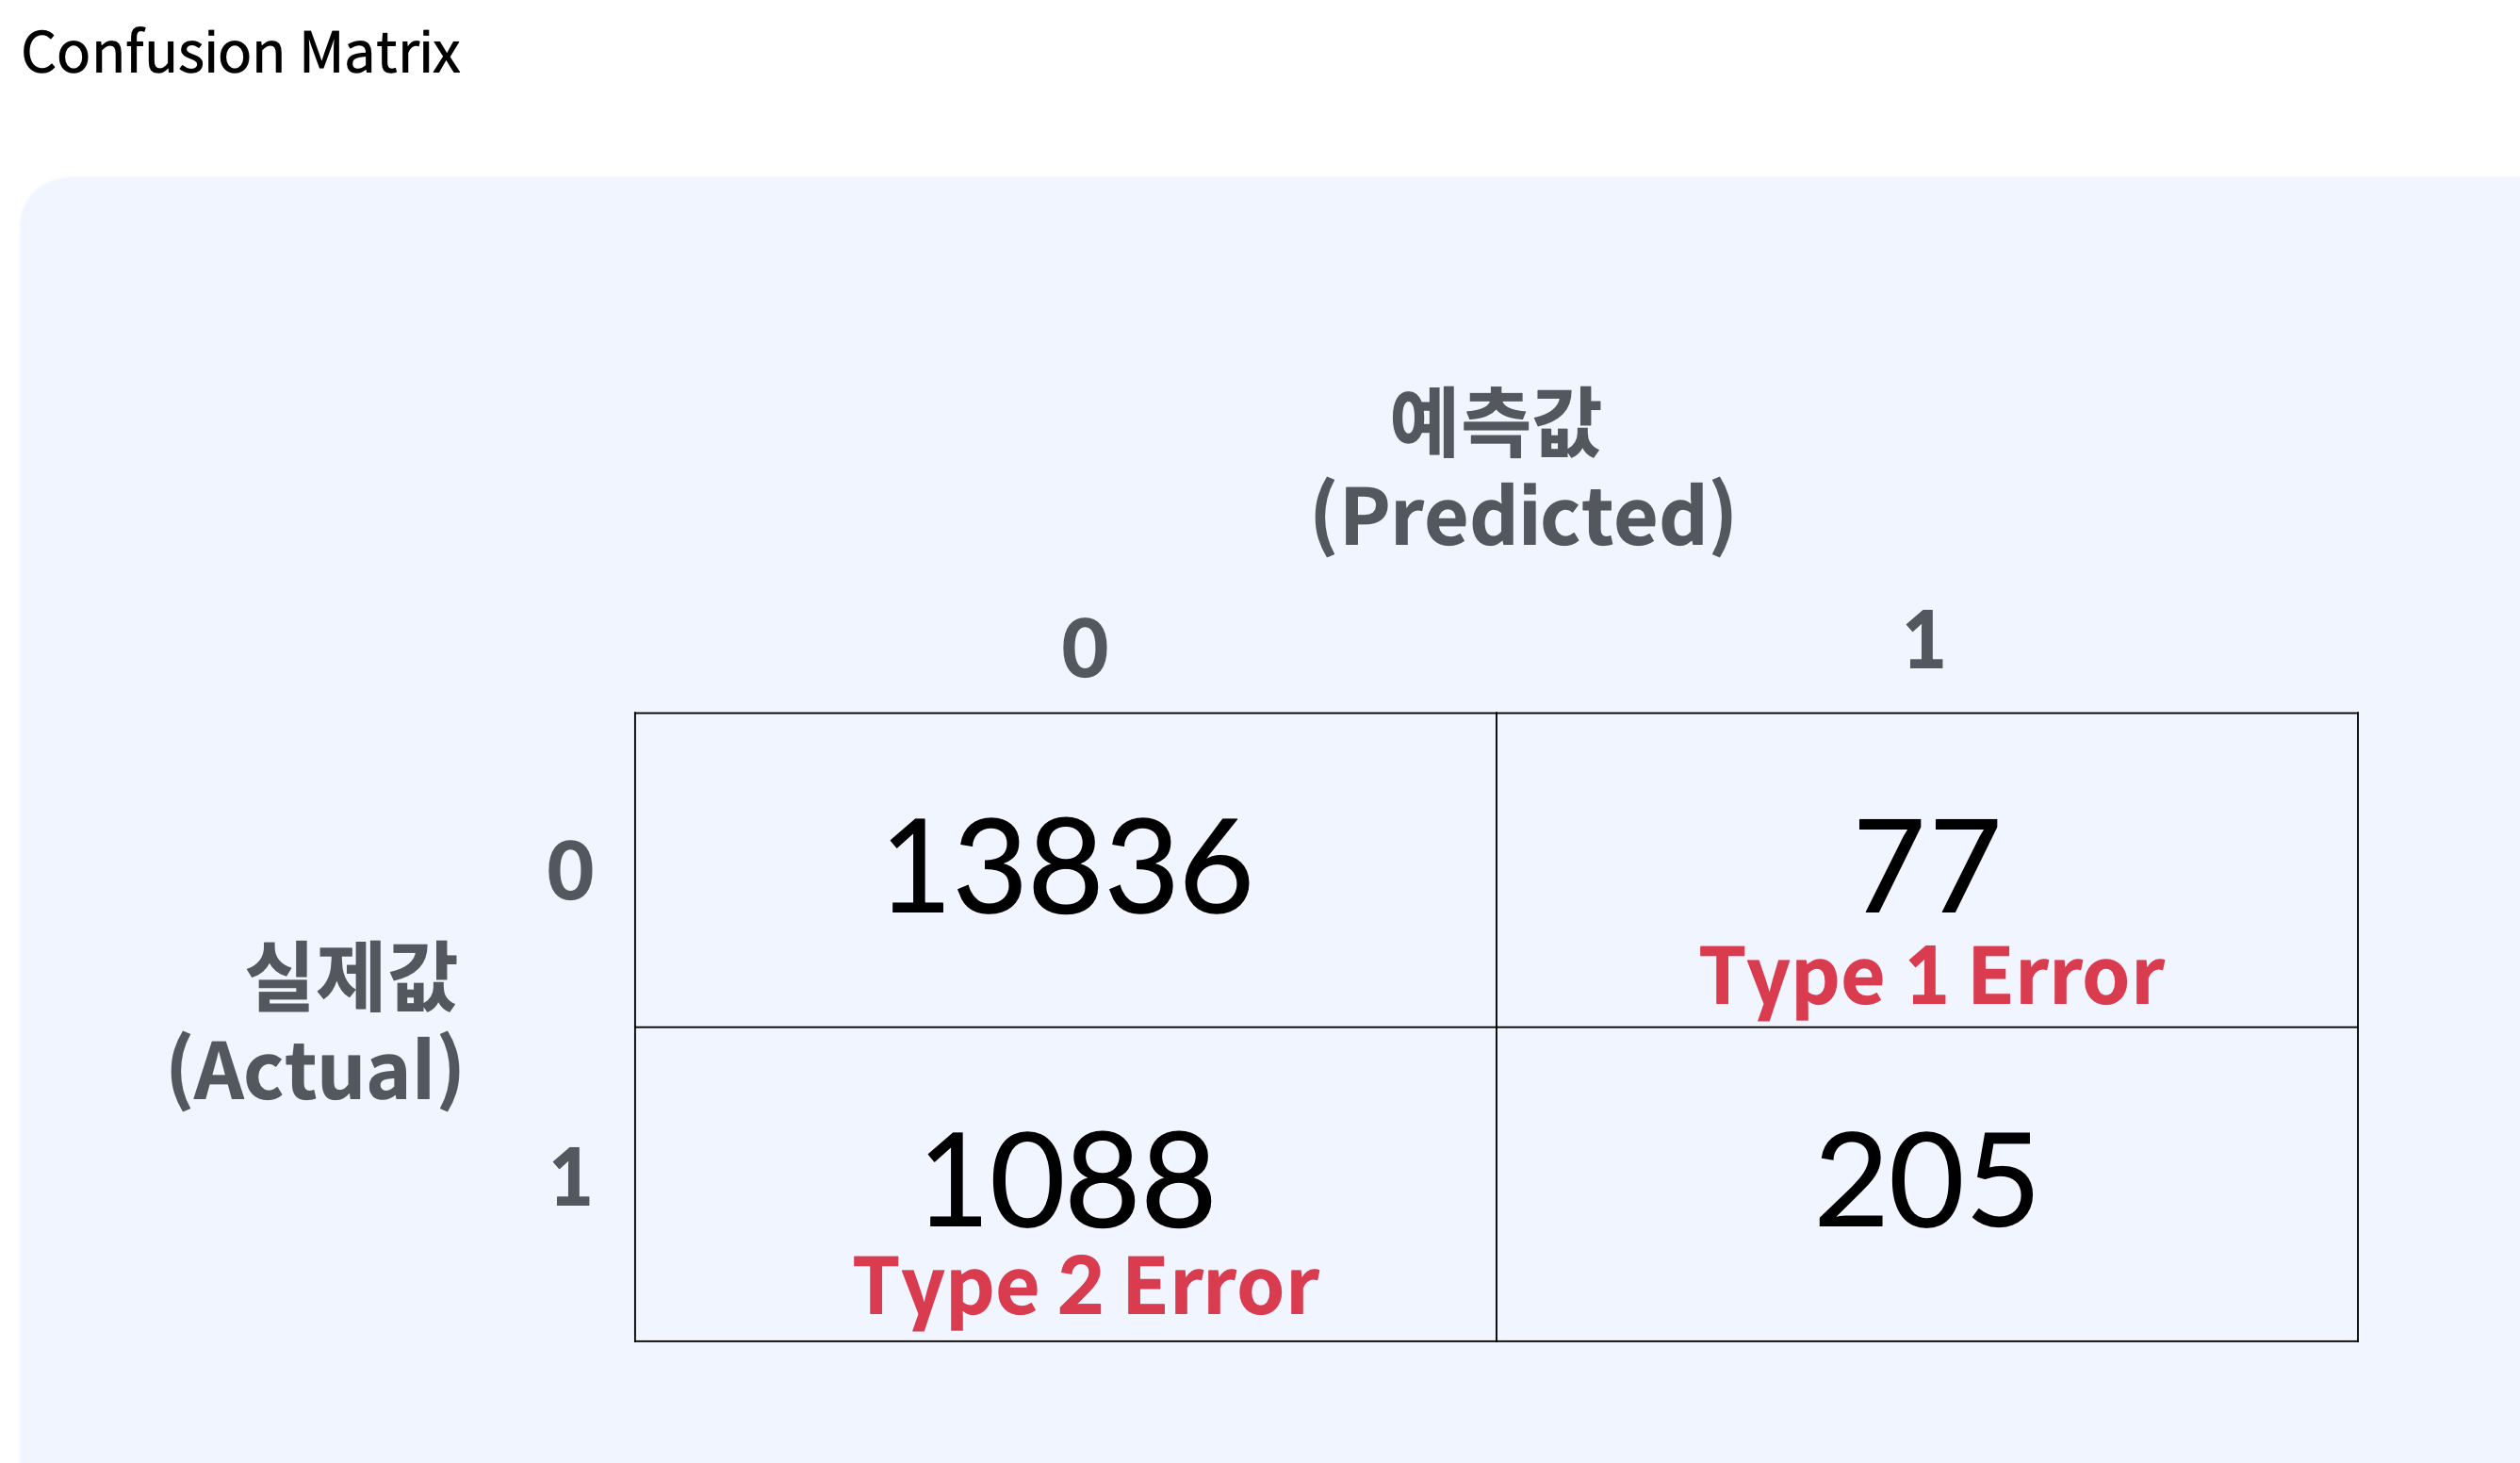

In [89]:
lr.coef_

array([[-6.76701459e-02, -7.83456085e-02,  4.31490725e-01,
         4.32331018e-02,  3.14951484e+00,  9.53137635e-02,
        -1.68885755e+00, -1.39401210e-01, -2.66270111e-01,
        -2.87490632e-01,  3.55077808e-01, -4.04789142e-01,
        -1.34256214e+00,  1.29994023e+00, -1.22150250e+00,
        -1.09729638e-01, -2.14639486e-01, -5.42078616e-01,
        -3.00212075e-01,  2.17327690e-02, -1.18568246e-01,
        -5.50172056e-02, -2.29504817e-01,  4.52514094e-01,
        -3.08283410e-03, -1.16064949e-01,  1.59673017e-01,
        -3.98086938e-01, -1.77063312e-01,  3.54803151e-01,
         3.33291799e-01, -3.46281520e-01,  3.10222627e-01,
        -5.33888954e-01, -1.57205426e-01,  2.45659417e-01,
        -5.70396361e-01,  6.10787498e-02, -1.97171437e-01,
        -5.11841341e-01, -5.73474460e-01, -1.74398250e-01,
        -1.88399135e-01,  8.09396090e-01, -4.02668140e-01,
        -3.80704187e-01,  4.40982652e-01, -2.07198042e-01,
        -3.77534235e-01, -1.00499003e+00, -8.00677561e-0

In [90]:
 temp_X = hr_df1[['age','length_of_service']]
 temp_y = hr_df1['is_promoted']

In [91]:
temp_lr = LogisticRegression()

In [92]:
temp_lr.fit(temp_X, temp_y)

LogisticRegression()

In [97]:
temp_df = pd.DataFrame({'age' : [20,21,22], 'length_of_service' : [10,15,20]})

In [98]:
pred1 = temp_lr.predict(temp_df)

In [99]:
pred1

array([0, 0, 0])

In [100]:
proba = temp_lr.predict_proba(temp_df)

In [101]:
proba # 0일 확률, 1일 확률

array([[0.90188998, 0.09811002],
       [0.90276342, 0.09723658],
       [0.90362992, 0.09637008]])

In [102]:
temp_lr.coef_

array([[-1.00231529e-02,  2.25233041e-05]])

In [103]:
temp_lr.intercept_

array([-2.01816523])

# Cross Validation

In [104]:
from sklearn.model_selection import KFold

In [108]:
kf = KFold(n_splits= 5, random_state= 100, shuffle= True) # 분리 (5개로) 설정, 랜덤 100번으로,

In [113]:
acc_list = []
for i,j in kf.split(range(len(hr_df1))):
  X = hr_df1.drop('is_promoted', axis= 1)
  y = hr_df1['is_promoted']

  X_train1 = X.iloc[i]
  X_test1 = X.iloc[j]
  y_train1 = y.iloc[i]
  y_test1 = y.iloc[j]

  lr = LogisticRegression()
  lr.fit(X_train1, y_train1)
  pred2 = lr.predict(X_test1)
  acc_list.append(accuracy_score(y_test1, pred2))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [114]:
acc_list

[0.9296636085626911,
 0.9243365887343395,
 0.9238433461576403,
 0.9219690243661833,
 0.9249210734017363]

In [115]:
sum(acc_list)/ 5

0.9249467282445183

In [116]:
np.array(acc_list).mean()

0.9249467282445183